In [1]:
import matplotlib.pyplot as pp
import pandas as pd
import seaborn
import itertools
%matplotlib inline

In [3]:
level = ['simple','complex','balanced']
action = ['read','write','update','delete']

table_titles = [ x + " "+ y  for x in level for y in action]
print table_titles

['simple read', 'simple write', 'simple update', 'simple delete', 'complex read', 'complex write', 'complex update', 'complex delete', 'balanced read', 'balanced write', 'balanced update', 'balanced delete']


In [23]:
result_table = pd.read_csv('result.csv',names=['name']+table_titles)
result_table.head()

,name,simple read,simple write,simple update,simple delete,complex read,complex write,complex update,complex delete,balanced read,balanced write,balanced update,balanced delete
0,ORMLite,151,666,122,105,445,3836,857,811,1563,3426,724,728
1,SugarORM,245,842,252,152,1402,4129,1467,1003,2204,4397,1702,1197
2,DBFlow,97,757,459,186,360,3534,3124,1044,1129,4653,5204,1268


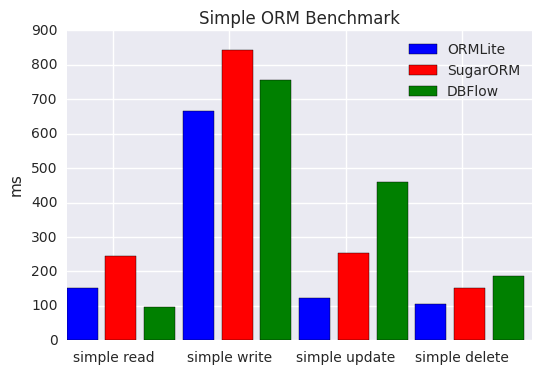

In [89]:
colors=['b','r','g','y','w','']

rows = len(result_table.index)

pp.title('Simple ORM Benchmark')

maximum = 0 

for i in range(rows):
    row = result_table.iloc[i]
    data = [row[k] for k in table_titles[:4]]
    pp.bar([len(result_table.index)*j+i for j in range(4)],data, label=row['name'], color=colors[i])

pp.xticks([len(result_table.index)*j+1.2 for j in range(4)],[k for k in table_titles[:4]])

pp.legend()
pp.axis((0,rows*4,0,900))
#pp.xlabel('libs')
pp.ylabel('ms')